In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
np.__version__

'1.19.3'

In [3]:
pd.__version__

'1.1.4'

# Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's Fremont Bridge. This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge. The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the direct link to the dataset.

As of summer 2016, the CSV can be downloaded as follows:

In [4]:
!pwd

/home/yunghui/LabCodes/practice/Visualizing Seattle Bicycle Counts


In [5]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
# !curl -o FremontBridge2.csv  https://data.seattle.gov/resource/65db-xm6k.csv

In [6]:
# !pwd  #確認檔案路徑 
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)

In [9]:
data.tail()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2020-09-30 19:00:00,156.0,51.0,105.0
2020-09-30 20:00:00,70.0,27.0,43.0
2020-09-30 21:00:00,40.0,17.0,23.0
2020-09-30 22:00:00,23.0,10.0,13.0
2020-09-30 23:00:00,17.0,4.0,13.0


In [8]:
print(data.shape)
print('-'*100)
print(data.columns)
print('-'*100)
print(data.index)
print('-'*100)




(136334, 3)
----------------------------------------------------------------------------------------------------
Index(['Fremont Bridge Total', 'Fremont Bridge East Sidewalk',
       'Fremont Bridge West Sidewalk'],
      dtype='object')
----------------------------------------------------------------------------------------------------
DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2020-09-30 14:00:00', '2020-09-30 15:00:00',
               '2020-09-30 16:00:00', '2020-09-30 17:00:00',
               '2020-09-30 18:00:00', '2020-09-30 19:00:00',
               '2020-09-30 20:00:00', '2020-09-30 21:00:00',
               '2020-09-30 22:00:00', '2020-09-30 23:00:00'],
              dtype='datetime64

In [99]:
# shortening the column names:
    # data.columns = ['West', 'East']
    # data['Total'] = data.eval('West + East')
data.columns = ['Total','West(toward dt)', 'East(outward dt)']
data.tail()

# western sidewalk (generally used going toward downtown Seattle)


,Total,West(toward dt),East(outward dt)
Date,,,
2020-09-30 19:00:00,156.0,51.0,105.0
2020-09-30 20:00:00,70.0,27.0,43.0
2020-09-30 21:00:00,40.0,17.0,23.0
2020-09-30 22:00:00,23.0,10.0,13.0
2020-09-30 23:00:00,17.0,4.0,13.0


In [11]:
# take a look at the summary statistics for this data:
data.dropna().describe()

,Total,West,East
count,136313.000000,136313.000000,136313.000000
mean,112.975065,51.514060,61.461005
std,143.607191,66.214446,89.406687
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


## Visualizing the data

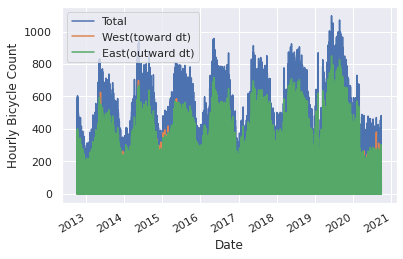

In [100]:
# Visualizing the data
data.plot()
plt.ylabel('Hourly Bicycle Count');

# but looks too dense...

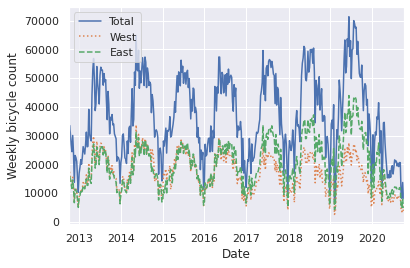

In [23]:
weekly = data.resample('W').sum()
weekly.plot(style=['-',':', '--'])
plt.ylabel('Weekly bicycle count');

'This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see In Depth: Linear Regression where we explore this further).'

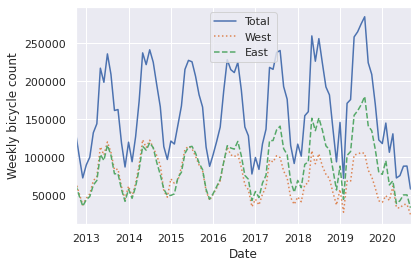

In [34]:
weekly = data.resample('M').sum()
weekly.plot(style=['-',':', '--'])
plt.ylabel('Weekly bicycle count');

# Summer >　Winter
# after 2017, East gradually > West
# Groth gradually,but dramastically drop down after 2020 Mar.(Corona virus)


'''This shows us some interesting seasonal trends: as you might expect, people
    bicycle more in the summer than in the winter, and even within a particular 
    season the bicycle use varies from week to week (likely dependent on weather;
    see In Depth: Linear Regression where we explore this further).
    '''

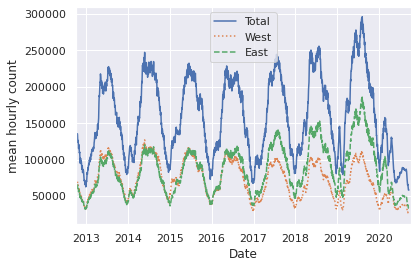

In [30]:
# 30 day rolling mean of data
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[ '-', ':', '--'])
plt.ylabel('mean hourly count');

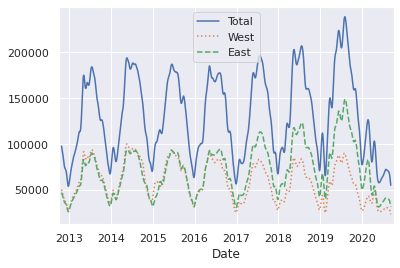

In [33]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[ '-', ':', '--']);

## Digging into the data
While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day. We can do this using the GroupBy functionality discussed in Aggregation and Grouping:

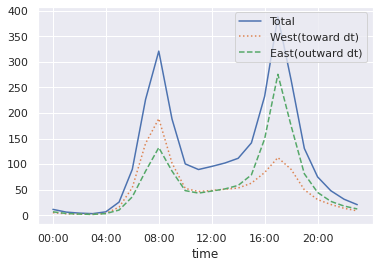

In [108]:

# 將資料依照時間切為24小時/個欄位
by_time = data.groupby(data.index.time).mean() 

# split day into 6 period * 4hours
hourly_ticks = 4 * 60 * 60 * np.arange(6)

by_time.plot(xticks=hourly_ticks, style=[ '-', ':', '--']);


# The hourly traffic is a strongly bimodal distribution.
# peak occurs at 8:00、17:00
# westside　peaks in the morning > toward downtown

# by_month = data.groupby(data.index.month).mean() 
# by_weekday = data.groupby(data.index.weekday).mean()  #Monday=0 and Sunday=6.
                     

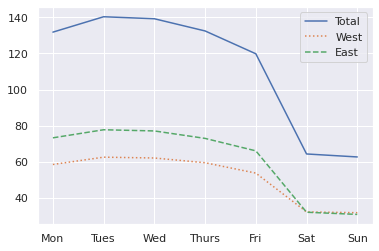

In [71]:
# 檢視周間的變化

by_weekday = data.groupby(data.index.dayofweek).mean()  #Monday=0 and Sunday=6.
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']  # assign index directly  

by_weekday.plot(style=['-', ':', '--']);

# weekday =  2.5-3x  weekend 
# East > West(toward downtown) ??

In [118]:
# 將資料分為 周間與周末兩組
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')  
    # numpy.where(condition[, x, y])。Where True, yield x, otherwise yield y.

# 依據周間周末 x 小時呈現每小時均值資料。
by_time = data.groupby([weekend, data.index.time]).mean()  # multiindex*2

Total  West(toward dt)  East(outward dt)
Weekday 00:00:00    9.431387         4.044346          5.387041
        01:00:00    4.671348         2.100271          2.571077
        02:00:00    3.115792         1.535600          1.580192
        03:00:00    2.678739         1.396403          1.282336
        04:00:00    7.534122         4.177384          3.356738
        05:00:00   32.825326        20.242424         12.582902
        06:00:00  118.766199        72.202020         46.564178
        07:00:00  303.740823       189.646957        114.093865
        08:00:00  425.290712       251.848731        173.441981
        09:00:00  230.423219       125.491250        104.931969
        10:00:00  100.123983        51.877742         48.246241
        11:00:00   76.354449        39.430614         36.923835
        12:00:00   79.368745        39.809712         39.559034
        13:00:00   85.783198        41.937916         43.845282
        14:00:00   97.454411        44.618531         52.835880
        15:00:00  140.250123        58.355101         81.895022
        16:00:00  272.713406        89.993593        182.719813
        17:00:00  499.379004       135.690734        363.688270
        18:00:00  336.076639       108.350665        227.725973
        19:00:00  159.715623        58.151306        101.564317
        20:00:00   88.239280        34.779694         53.459586
        21:00:00   55.176688        23.736570         31.440118
        22:00:00   34.815673        14.800641         20.015032
        23:00:00   21.743223         8.862247         12.880976
Weekend 00:00:00   15.881011         6.611591          9.269420
        01:00:00    9.210234         4.112207          5.098027
        02:00:00    5.975140         2.764450          3.210690
        03:00:00    3.445746         1.724414          1.721332
        04:00:00    3.824908         1.577682          2.247226
        05:00:00    7.348952         3.905672          3.443280
        06:00:00   16.950678         7.974106          8.976572
        07:00:00   32.514797        16.723798         15.790999
        08:00:00   60.160296        31.334155         28.826141
        09:00:00   82.203453        42.819975         39.383477
        10:00:00  100.627004        53.362515         47.264488
        11:00:00  121.654131        63.049322         58.604809
        12:00:00  135.300247        69.376695         65.923551
        13:00:00  142.745993        72.683107         70.062885
        14:00:00  145.797781        74.161529         71.636252
        15:00:00  144.338471        73.170160         71.168311
        16:00:00  132.809494        66.972256         65.837238
        17:00:00  110.530210        55.124538         55.405672
        18:00:00   85.086930        42.601726         42.485203
        19:00:00   57.540074        28.369297         29.170777
        20:00:00   41.590012        19.650432         21.939581
        21:00:00   29.331689        13.649199         15.682491
        22:00:00   21.970407         9.879162         12.091245
        23:00:00   17.257707         7.131319         10.126387

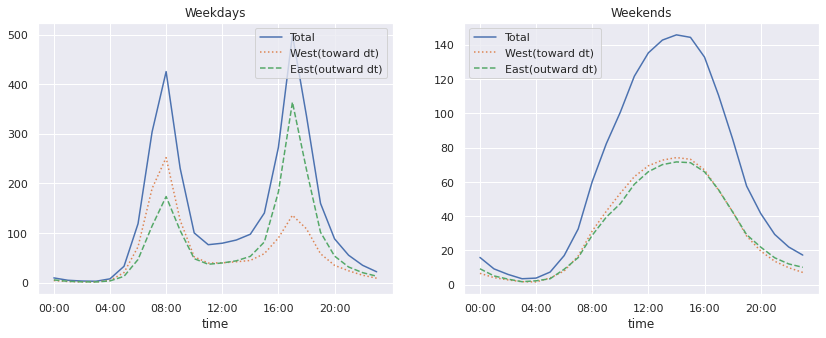

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=['-', ':', '--'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=['-', ':', '--']);

# Weekend peak at noon 

In [ ]:
'''The result is very interesting: we see a bimodal commute pattern during the work week,
and a unimodal recreational pattern during the weekends. It would be interesting to dig 
through this data in more detail, and examine the effect of weather, temperature, time of 
year, and other factors on people's commuting patterns; for further discussion, see my 
blog post "Is Seattle Really Seeing an Uptick In Cycling?", which uses a subset of this data.
We will also revisit this dataset in the context of modeling in In Depth: Linear Regression.'''

https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/

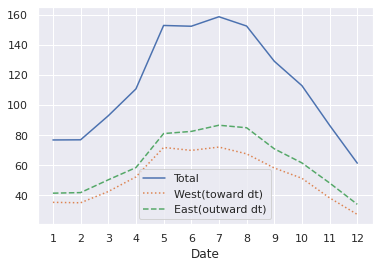

In [101]:
by_month = data.groupby(data.index.month).mean() 

month_ticks = np.arange(12)+1  #　jan start at 0

by_month.plot(xticks=month_ticks , style=['-', ':', '--']);

# Summer >> Winter

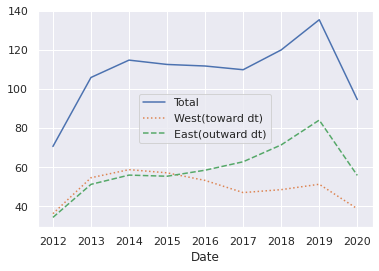

In [102]:
by_year = data.groupby(data.index.year).mean() 

year_ticks = np.arange(2012,2021)

# by_month.plot(style=['-', ':', '--']);
by_year.plot(xticks=year_ticks , style=['-', ':', '--']);

# after 2016, East >> West??? 

In [173]:
# group by season


# spring

m = data.index.month
# season = np.where( m==(3|4|5), 'Spring' , m )  
    # numpy.where(condition[, x, y])。Where True, yield x, otherwise yield y.
# season = np.where( m==(6|7|8), 'Summer' , m )
np.where( m==(9|10|11), 'Autumn' , m )
# season = np.where( m==(12|1|2), 'Winter' , m )
    
# 依據周間周末 x 小時呈現每小時均值資料。
# by_season = data.groupby([season, data.index.time]).mean()  # multiindex*2

array(['10', '10', '10', ..., '9', '9', '9'], dtype='<U21')

In [189]:
m1 = data.index.month
np.where( m1==10 , 'Autumn' , m1)

array(['Autumn', 'Autumn', 'Autumn', ..., '9', '9', '9'], dtype='<U21')

In [172]:
data.index.month

Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=136334)

In [ ]:
# 將資料分為 周間與周末兩組
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')  
    # numpy.where(condition[, x, y])。Where True, yield x, otherwise yield y.

# 依據周間周末 x 小時呈現每小時均值資料。
by_time = data.groupby([weekend, data.index.time]).mean()  # multiindex*2